# Exploratory Data Analysis

In [1]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 

In [2]:
categorical_features = bike_sharing.variables[(bike_sharing.variables["type"] == "Categorical")&(bike_sharing.variables["role"] == "Feature")]["name"].tolist()
numerical_features = bike_sharing.variables[(bike_sharing.variables["type"] == "Continuous")&(bike_sharing.variables["role"] == "Feature")]["name"].tolist()
binary_features = bike_sharing.variables[(bike_sharing.variables["type"] == "Binary")&(bike_sharing.variables["role"] == "Feature")]["name"].tolist()
target = bike_sharing.variables[bike_sharing.variables["role"] == "Target"]["name"].tolist()[0]

In [3]:
all_data = X.copy()
all_data[target] = y

In [4]:
X[categorical_features].describe()

,season,yr,mnth,hr,weekday,weathersit
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,3.003683,1.425283
std,1.106918,0.500008,3.438776,6.914405,2.005771,0.639357
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,1.000000,1.000000
50%,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000
75%,3.000000,1.000000,10.000000,18.000000,5.000000,2.000000
max,4.000000,1.000000,12.000000,23.000000,6.000000,4.000000


The information shown above is not very descriptive for categorical data

In [5]:
X[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   season      17379 non-null  int64
 1   yr          17379 non-null  int64
 2   mnth        17379 non-null  int64
 3   hr          17379 non-null  int64
 4   weekday     17379 non-null  int64
 5   weathersit  17379 non-null  int64
dtypes: int64(6)
memory usage: 814.8 KB


as it can be observed that the categorical features are int64 (integer). Lets use categorical pandas type.

In [6]:
X[categorical_features] = X[categorical_features].astype('category')

C:\Users\manue\AppData\Local\Temp\ipykernel_35144\4036185465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].astype('category')


In [7]:
X[categorical_features].describe().T

,count,unique,top,freq
season,17379,4,3,4496
yr,17379,2,1,8734
mnth,17379,12,5,1488
hr,17379,24,17,730
weekday,17379,7,6,2512
weathersit,17379,4,1,11413


Now we can see more information that is relevant for categorical variables. 

In [8]:
X[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       17379 non-null  float64
 1   atemp      17379 non-null  float64
 2   hum        17379 non-null  float64
 3   windspeed  17379 non-null  float64
dtypes: float64(4)
memory usage: 543.2 KB


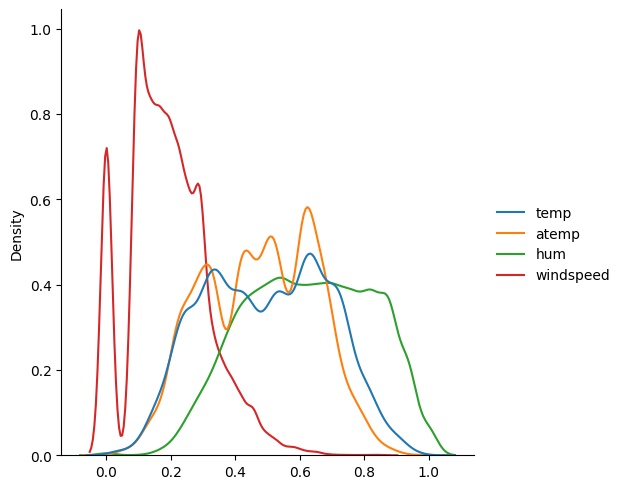

In [9]:
sns.displot(X[numerical_features], kind="kde")

In [10]:
target

'cnt'

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

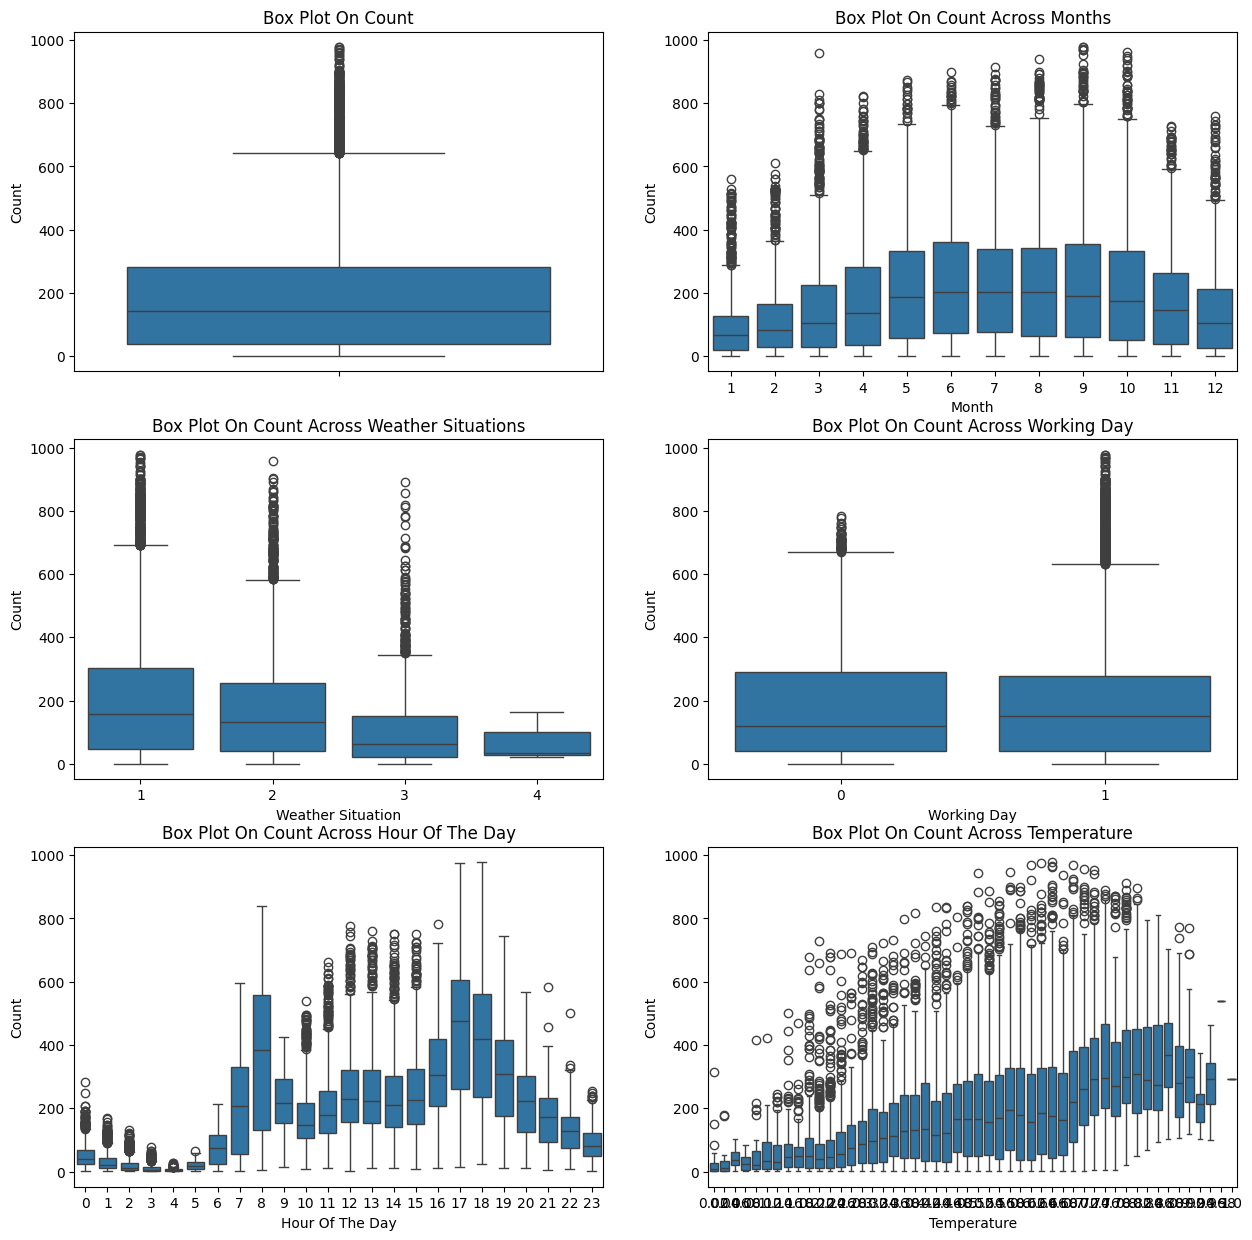

In [11]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=all_data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=all_data,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=all_data,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=all_data,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=all_data,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=all_data,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

The box plot for the "Hour of Day" shows an interesting pattern: the maximum values are reached at 8 am and 5 pm. This suggests that the bicycle is used to commute to work or school, and it is also used at the end of the working/school day. The box plot for the count based on temperature shows that bicycle usage is lower at colder temperatures. We can also observe the presence of outliers.

# Removing outliers

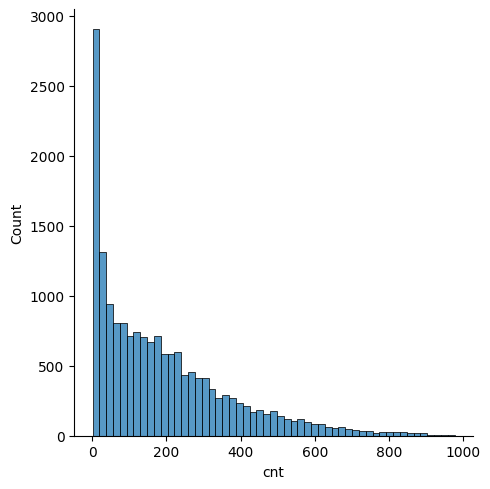

In [12]:
sns.displot(all_data[target], kind="hist")

we can observe that the count value (target) does not follow a normal distribution.

Samples in dataset with outliers: 17379
Samples in dataset without outliers: 16874


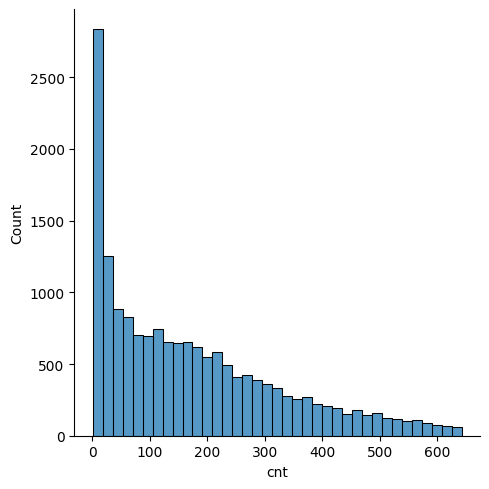

In [13]:
print("Samples in dataset with outliers: {}".format(len(all_data)))
q1 = all_data.cnt.quantile(0.25)
q3 = all_data.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
all_data_preprocessed = all_data.loc[(all_data.cnt >= lower_bound) & (all_data.cnt <= upper_bound)]
print("Samples in dataset without outliers: {}".format(len(all_data_preprocessed)))
sns.displot(all_data_preprocessed.cnt, kind="hist")

In [14]:
X[binary_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   holiday     17379 non-null  int64
 1   workingday  17379 non-null  int64
dtypes: int64(2)
memory usage: 271.7 KB


# Time series

array([<Axes: xlabel='dteday'>, <Axes: xlabel='dteday'>], dtype=object)

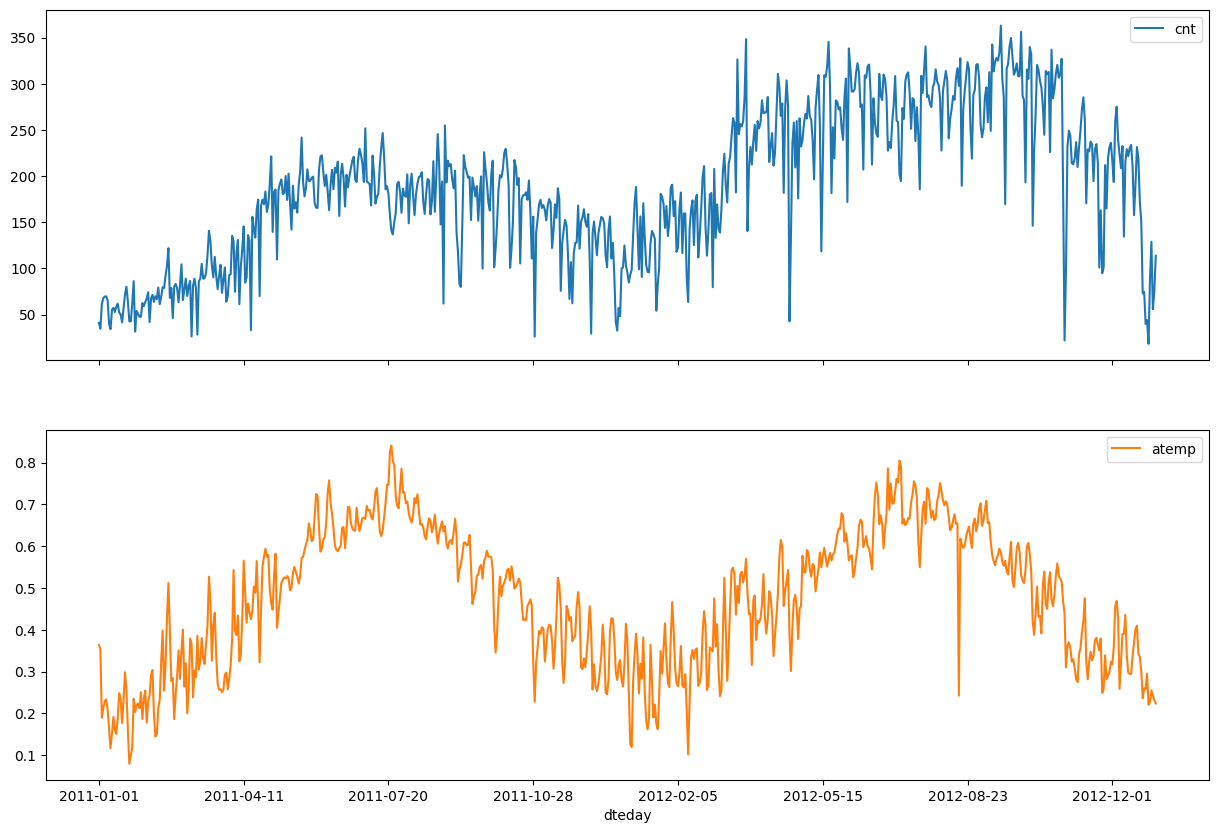

In [15]:
all_data.groupby("dteday").agg({target: "mean", "atemp":"mean"}).sort_values(by="dteday", ascending=True).plot(subplots=True, figsize=(15, 10))

The time series data confirms what was observed earlier: bicycle usage tends to be lower during the coldest weather.